In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = pd.read_csv('data/train_kaggle.csv')

d

C:\Users\User\AppData\Local\Temp\ipykernel_21132\3281056906.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('data/train_kaggle.csv')


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.4,3893.4,3448.44,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


In [3]:
# check duplicates

d.duplicated().sum()

0

In [4]:
# # impute missing values of numerical columns with the mean
# d.fillna(d.mean(), inplace=True)


TypeError: Horizontal orientation requires numeric `x` variable.

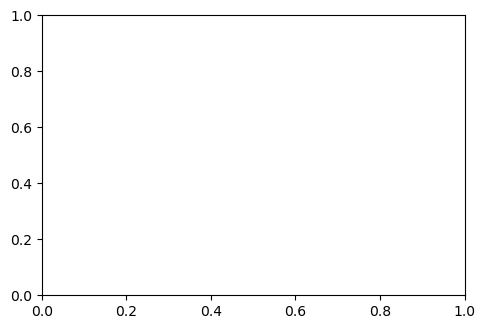

In [5]:
# List of columns to plot
columns_to_plot = ['luxury_sales', 'fresh_sales', 'dry_sales']  # Replace with your columns

# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=d[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

In [42]:
def preprocess():
    data = pd.read_csv('data/train_kaggle.csv')
    data = data.dropna(subset=['cluster_catgeory'])
    data['luxury_sales'] = pd.to_numeric(data['luxury_sales'], errors='coerce')
    data['fresh_sales'] = pd.to_numeric(data['fresh_sales'], errors='coerce')
    data['dry_sales'] = pd.to_numeric(data['dry_sales'], errors='coerce')

    # convert all three columns to float
    data['luxury_sales'] = data['luxury_sales'].astype(float)
    data['fresh_sales'] = data['fresh_sales'].astype(float)
    data['dry_sales'] = data['dry_sales'].astype(float)

    data = data.dropna()

    data['total_sales'] = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']




    # Convert the 'cluster_catgeory' column to numeric, coercing errors to NaN
    data['cluster_catgeory'] = pd.to_numeric(data['cluster_catgeory'], errors='coerce')

    # Drop rows with NaN values in the 'cluster_catgeory' column
    data = data.dropna(subset=['cluster_catgeory'])

    # Convert the 'cluster_catgeory' column to integers
    data['cluster_catgeory'] = data['cluster_catgeory'].astype(int)

    # Define the valid categories
    valid_categories = [1, 2, 3, 4, 5, 6]

    # Filter the rows to keep only those with valid categories
    data = data[data['cluster_catgeory'].isin(valid_categories)]

    # Get the number of occurrences for each distinct value in the 'cluster_catgeory' column
    occurrences = data['cluster_catgeory'].value_counts()

    # Print the occurrences
    print(f"class occurences: {occurrences}")




    data['luxury_sales_ratio'] = data['luxury_sales'] / data['total_sales']
    data['fresh_sales_ratio'] = data['fresh_sales'] / data['total_sales']
    data['dry_sales_ratio'] = data['dry_sales'] / data['total_sales']

    # Logarithmic Sales
    data['log_luxury_sales'] = np.log(data['luxury_sales'] + 1)
    data['log_fresh_sales'] = np.log(data['fresh_sales'] + 1)
    data['log_dry_sales'] = np.log(data['dry_sales'] + 1)
    data['log_total_sales'] = np.log(data['total_sales'] + 1)

    # Sales Ratios
    data['luxury_to_fresh_ratio'] = data['luxury_sales'] / data['fresh_sales']
    data['luxury_to_dry_ratio'] = data['luxury_sales'] / data['dry_sales']
    data['fresh_to_dry_ratio'] = data['fresh_sales'] / data['dry_sales']

    # Interaction Terms
    data['luxury_fresh_interaction'] = data['luxury_sales'] * data['fresh_sales']
    data['luxury_dry_interaction'] = data['luxury_sales'] * data['dry_sales']
    data['fresh_dry_interaction'] = data['fresh_sales'] * data['dry_sales']

    #     # Apply standard scaling
    # scaler = StandardScaler()
    # scaled_features = scaler.fit_transform(data[['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales', 'log_total_sales']])

    # # Convert the scaled features back to a DataFrame
    # scaled_df = pd.DataFrame(scaled_features, columns=['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales', 'log_total_sales'])

    # # Merge with the original data
    # data = data.drop(columns=['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales', 'log_total_sales'])
    # data = pd.concat([data, scaled_df], axis=1)


    out_station = ['Kalmunai','Negombo','Galle','Gampaha','Batticaloa','Jaffna','Kandy','Trincomalee','Panadura','Nuwara Eliya']

    # create a new column 'is_out_station' that is True if the 'outlet_city' is in the 'out_station' list
    data['is_out_station'] = data['outlet_city'].isin(out_station) 

    data = pd.get_dummies(data, columns=['outlet_city'])

    bool_cols = data.select_dtypes(include=['bool']).columns
    data[bool_cols] = data[bool_cols].astype(int)

    return data

In [43]:
data = preprocess()

data.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_21132\737128225.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


Customer_ID                           0
luxury_sales                          0
fresh_sales                           0
dry_sales                             0
cluster_catgeory                      0
total_sales                           0
luxury_sales_ratio                    0
fresh_sales_ratio                     0
dry_sales_ratio                       0
log_luxury_sales                      0
log_fresh_sales                       0
log_dry_sales                         0
log_total_sales                       0
luxury_to_fresh_ratio                 0
luxury_to_dry_ratio                   0
fresh_to_dry_ratio                    0
luxury_fresh_interaction              0
luxury_dry_interaction                0
fresh_dry_interaction                 0
is_out_station                        0
outlet_city_Batticaloa                0
outlet_city_Colombo                   0
outlet_city_Dehiwala-Mount Lavinia    0
outlet_city_Galle                     0
outlet_city_Gampaha                   0


C:\Users\User\AppData\Local\Temp\ipykernel_21132\3353194035.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


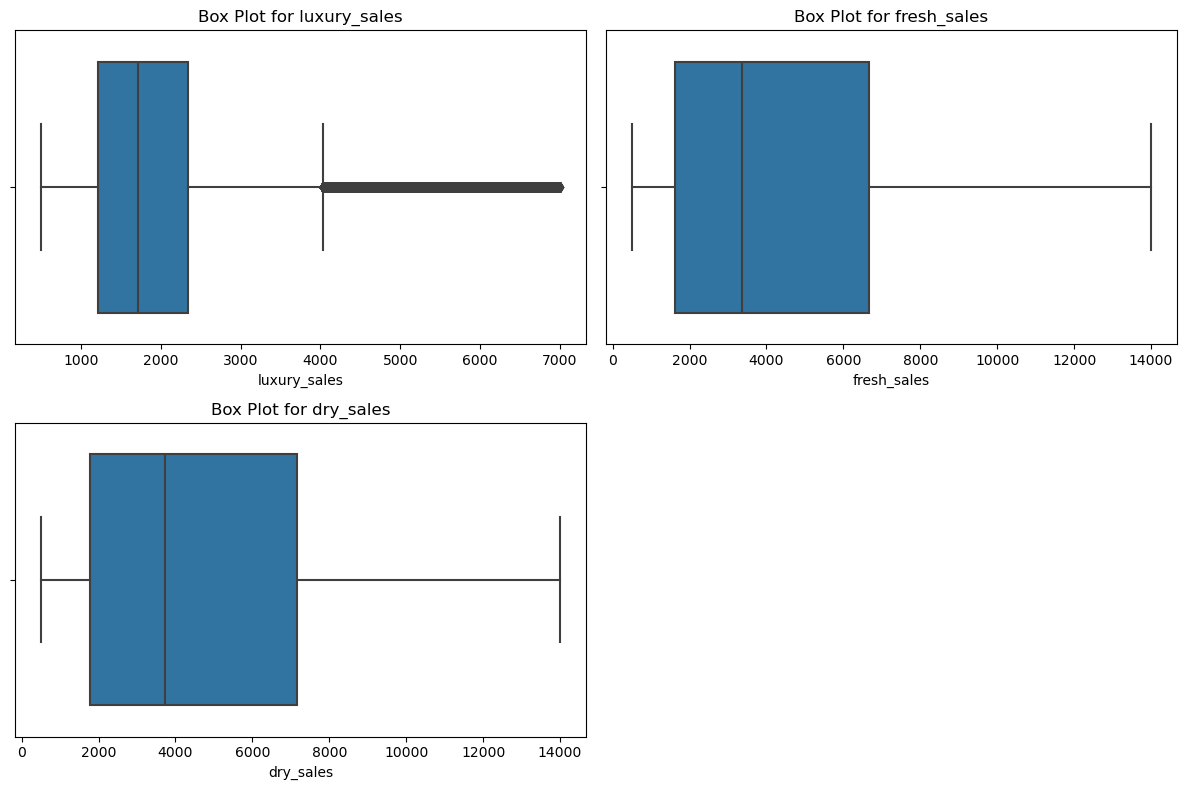

In [31]:
data = preprocess()
columns_to_plot = ['luxury_sales', 'fresh_sales', 'dry_sales']  # Replace with your columns

# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21132\3353194035.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


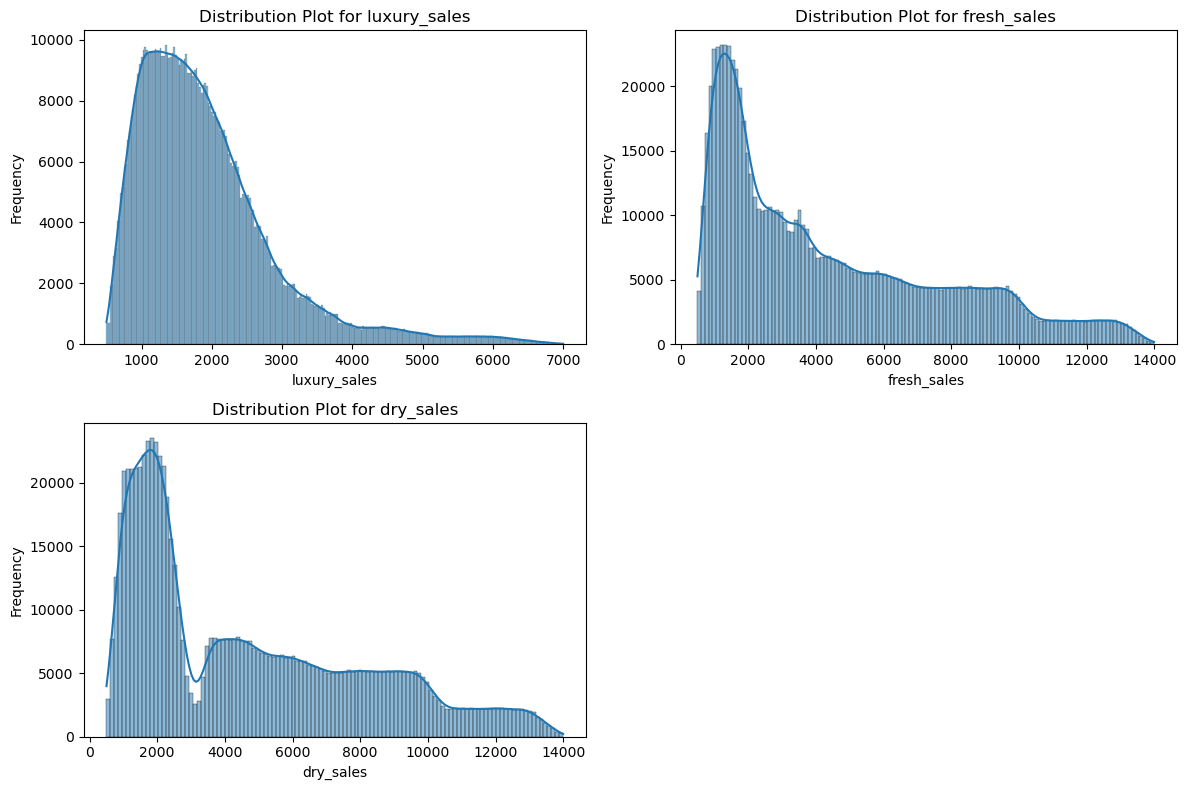

In [32]:
data = preprocess()
columns_to_plot = ['luxury_sales', 'fresh_sales', 'dry_sales']  # Replace with your columns

# Create distribution plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns as needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


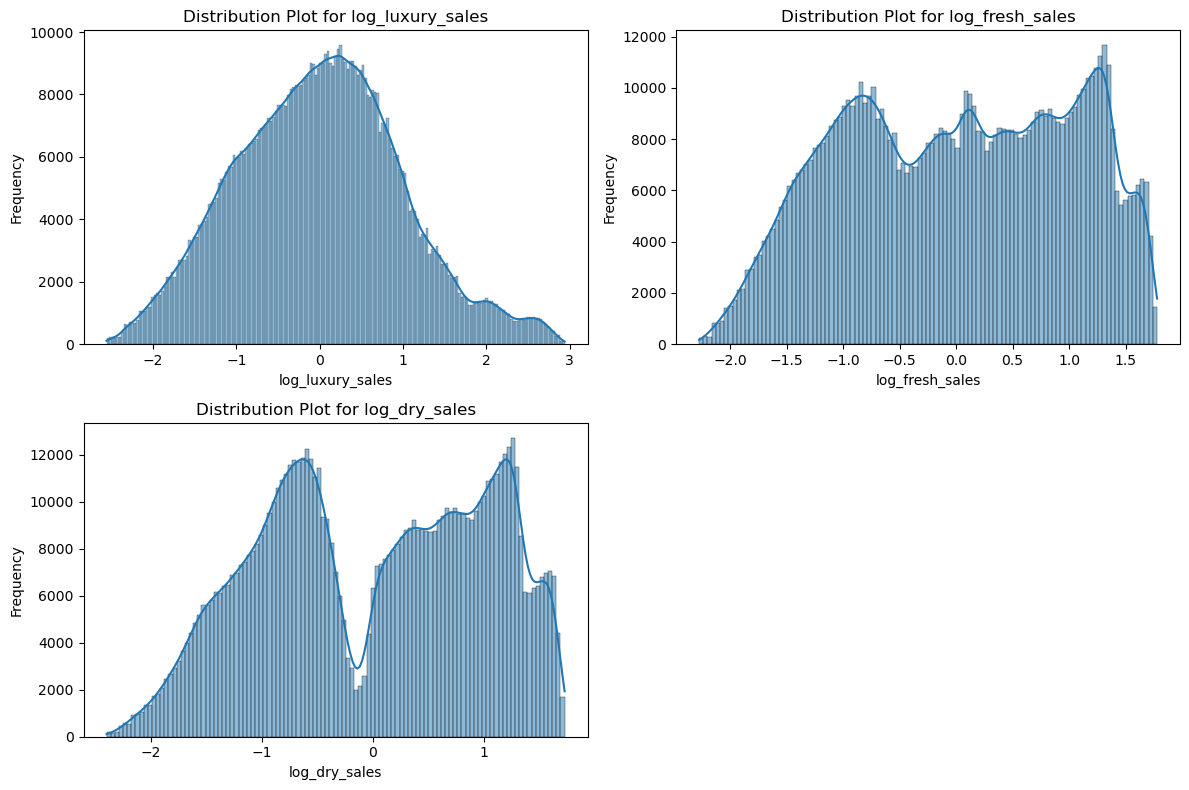

In [33]:
columns_to_plot = ['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales']  # Replace with your columns

# Create distribution plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Adjust the number of rows and columns as needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(data.target.values.reshape(-1, 1))

data['target_class'] = gmm.predict(data.target.values.reshape(-1, 1))

C:\Users\User\AppData\Local\Temp\ipykernel_21132\2495047010.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,10493832.0,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,7.098871,...,0,1,0,0,0,0,0,0,0,0
1,10178643.0,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,7.372193,...,0,0,0,1,0,0,0,0,0,0
2,10513916.0,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,7.736255,...,0,0,0,0,0,0,0,0,0,1
3,10334589.0,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,7.730148,...,0,0,0,0,0,0,0,0,0,1
4,10458365.0,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,7.760676,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774144,10672018.0,2695.45,2782.40,2608.50,3,8086.35,0.333333,0.344086,0.322581,7.899691,...,0,0,0,0,0,0,0,0,0,0
774145,10764536.0,1644.80,1593.40,1747.60,3,4985.80,0.329897,0.319588,0.350515,7.405982,...,0,0,0,0,0,0,0,0,0,0
774146,10134170.0,3796.80,3678.15,3915.45,3,11390.40,0.333333,0.322917,0.343750,8.242177,...,0,0,0,0,0,0,0,0,0,0
774149,10204308.0,2389.76,2240.40,2613.80,3,7243.96,0.329897,0.309278,0.360825,7.779367,...,1,0,0,0,0,0,0,0,0,0


C:\Users\User\AppData\Local\Temp\ipykernel_21132\3353194035.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64
                          Spearman Correlation
luxury_sales                               NaN
fresh_sales                                NaN
dry_sales                                  NaN
total_sales                                NaN
log_luxury_sales                           NaN
log_fresh_sales                            NaN
log_dry_sales                              NaN
log_total_sales                            NaN
luxury_sales_ratio                         NaN
fresh_sales_ratio                          NaN
dry_sales_ratio                            NaN
luxury_to_fresh_ratio                      NaN
luxury_to_dry_ratio                        NaN
fresh_to_dry_ratio                         NaN
luxury_fresh_interaction                   NaN
luxury_dry_interaction                     NaN
fresh_dry_interaction                      NaN
is_out_station       

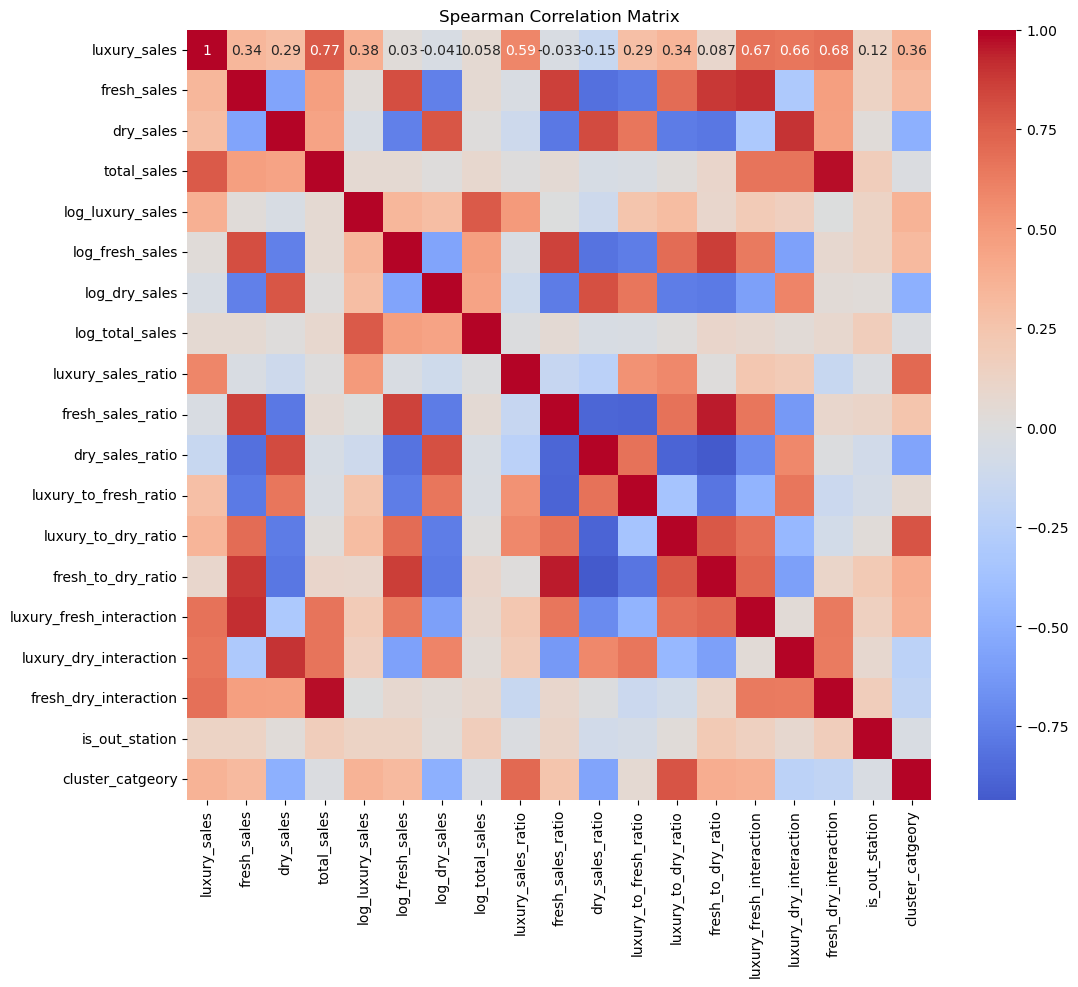

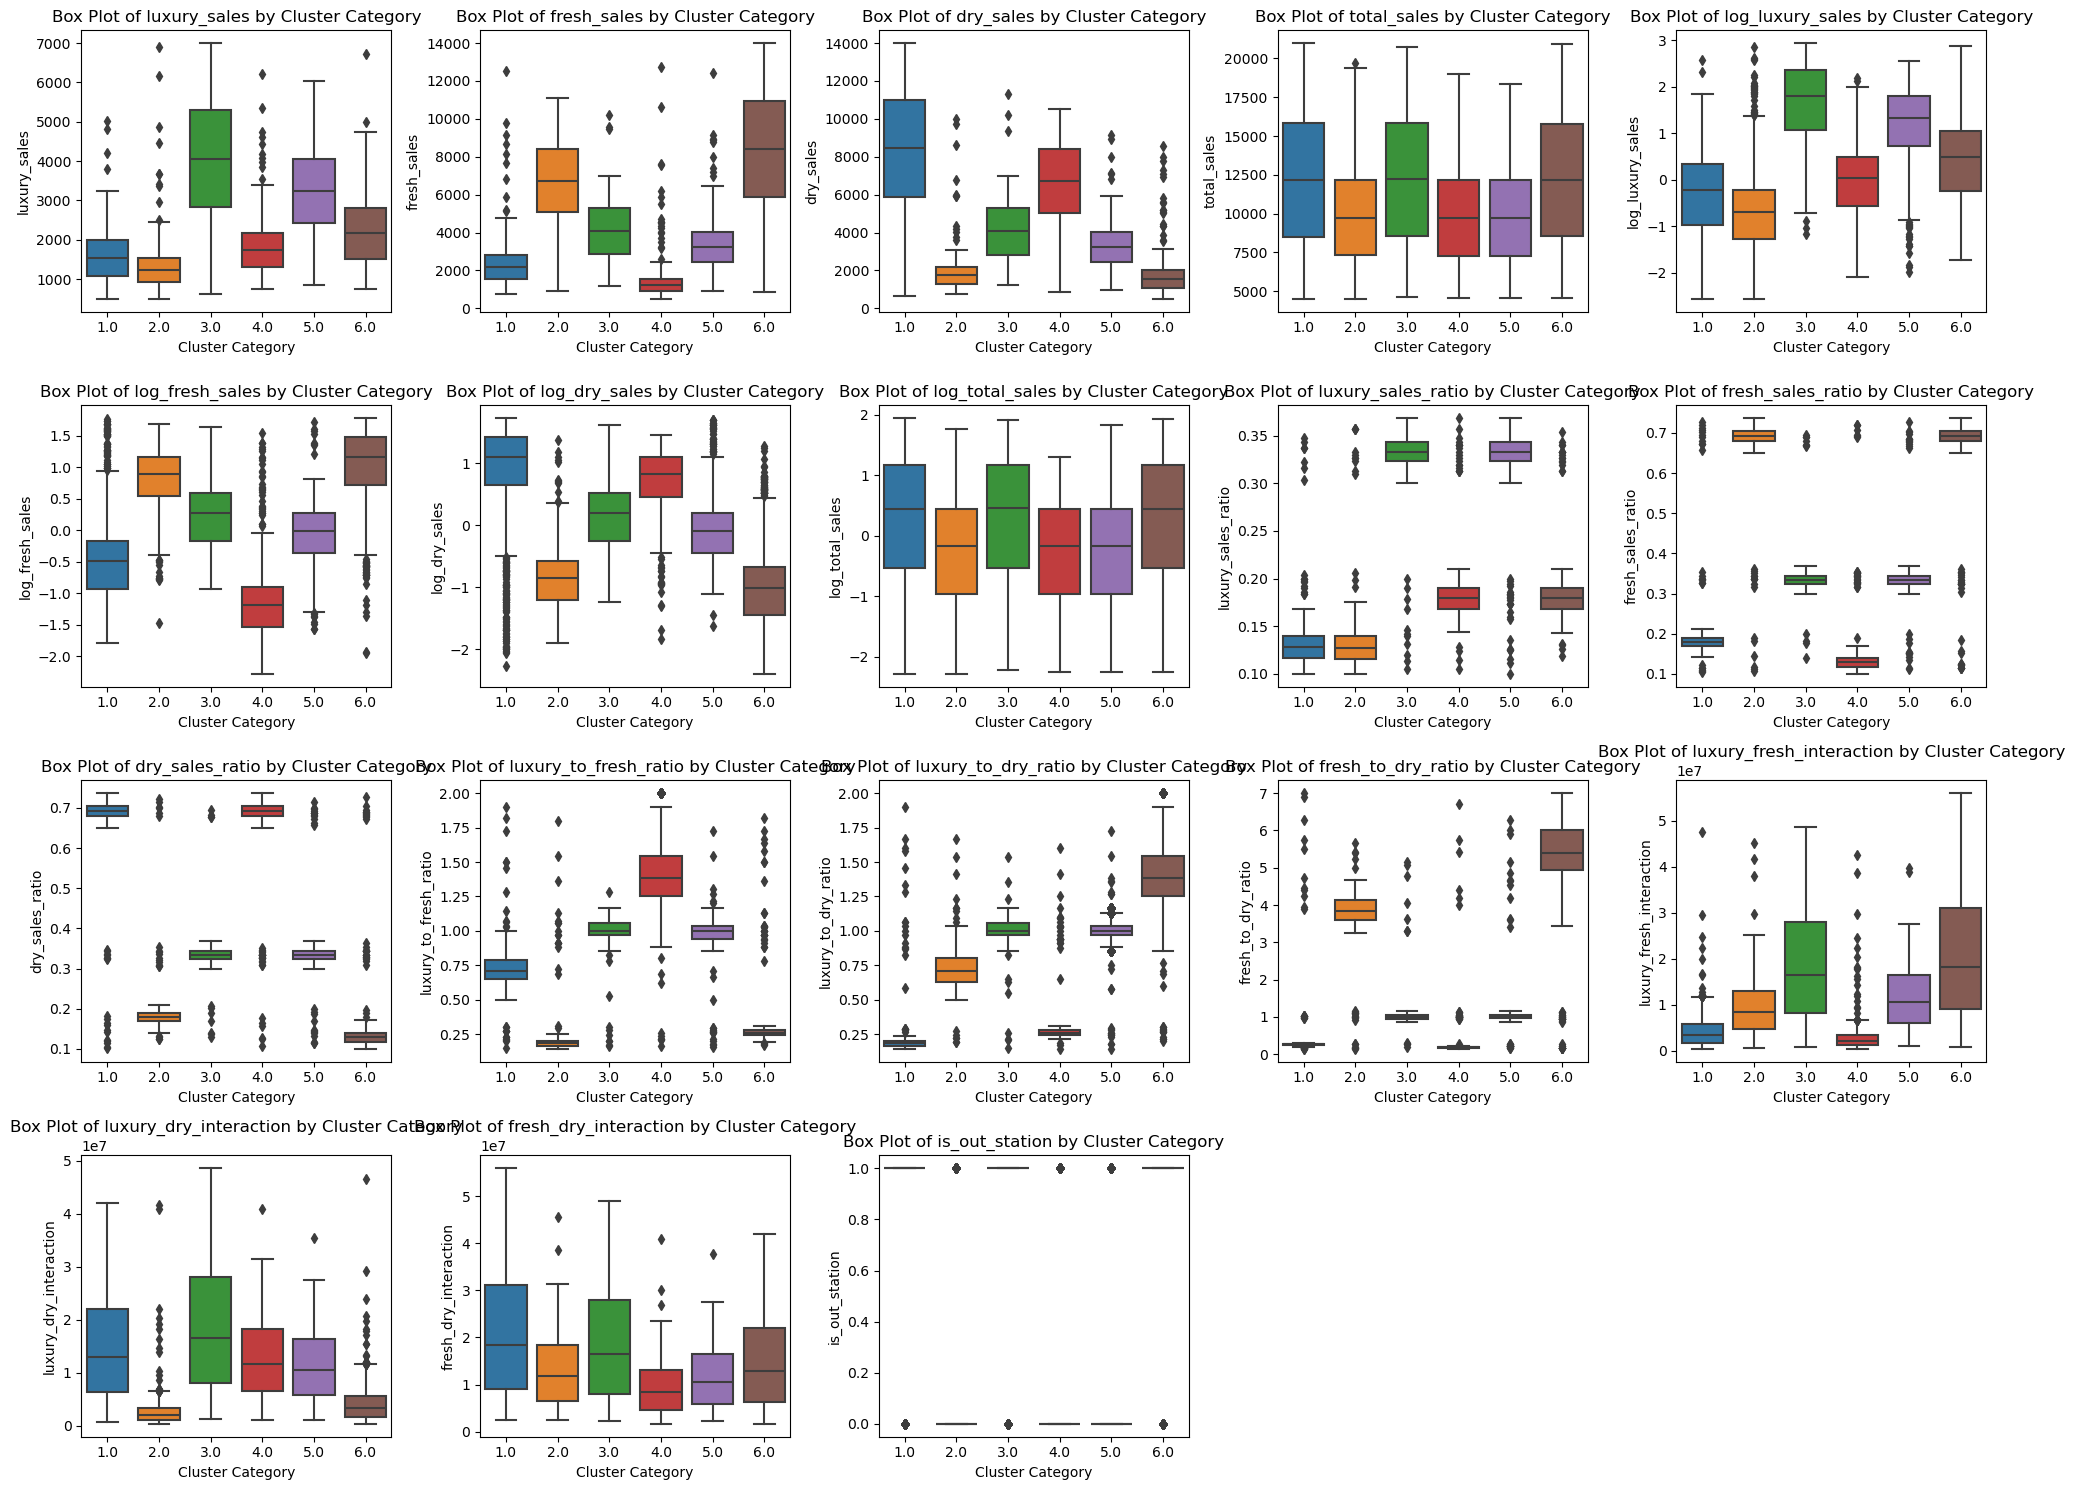

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau, chi2_contingency
from sklearn.preprocessing import LabelEncoder


df = preprocess()

# Numerical features correlation with the target
numerical_features = ['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales',
                      'log_luxury_sales', 'log_fresh_sales', 'log_dry_sales', 'log_total_sales',
                      'luxury_sales_ratio', 'fresh_sales_ratio', 'dry_sales_ratio',
                      'luxury_to_fresh_ratio', 'luxury_to_dry_ratio', 'fresh_to_dry_ratio',
                      'luxury_fresh_interaction', 'luxury_dry_interaction', 'fresh_dry_interaction', 'is_out_station']

correlations = {}
for feature in numerical_features:
    corr, _ = spearmanr(data[feature], data['cluster_catgeory'])
    correlations[feature] = corr

# Convert to DataFrame for better visualization
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Spearman Correlation'])
corr_df.sort_values(by='Spearman Correlation', ascending=False, inplace=True)
print(corr_df)


# Heatmap for correlation matrix
corr_matrix = data[numerical_features + ['cluster_catgeory']].corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Matrix')
plt.show()

# Box plots for numerical features vs. target
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x='cluster_catgeory', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Cluster Category')
    plt.xlabel('Cluster Category')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


In [35]:
# Example for a categorical feature
categorical_features = ['is_out_station'] + [col for col in data.columns if 'outlet_city_' in col]

chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['cluster_catgeory'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[feature] = p

chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['p-value'])
chi2_df.sort_values(by='p-value', ascending=True, inplace=True)
print(chi2_df)


                                    p-value
is_out_station                          0.0
outlet_city_Peliyagoda                  0.0
outlet_city_Panadura                    0.0
outlet_city_Nuwara Eliya                0.0
outlet_city_Negombo                     0.0
outlet_city_Moratuwa                    0.0
outlet_city_Kotte                       0.0
outlet_city_Kelaniya                    0.0
outlet_city_Katunayake                  0.0
outlet_city_Trincomalee                 0.0
outlet_city_Kandy                       0.0
outlet_city_Kaduwela                    0.0
outlet_city_Jaffna                      0.0
outlet_city_Homagama                    0.0
outlet_city_Gampaha                     0.0
outlet_city_Galle                       0.0
outlet_city_Dehiwala-Mount Lavinia      0.0
outlet_city_Colombo                     0.0
outlet_city_Batticaloa                  0.0
outlet_city_Kalmunai                    0.0
outlet_city_Wattala                     0.0


Distribution of Cluster Categories:
cluster_catgeory
1.0    188956
4.0    172424
6.0    169203
2.0    155037
3.0     48888
5.0     39525
Name: count, dtype: int64


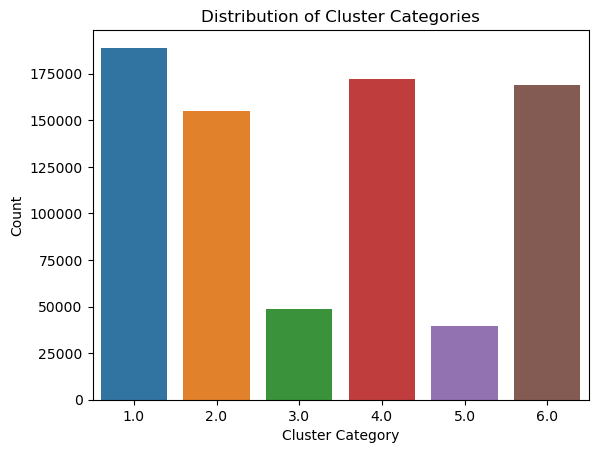

In [37]:
# Print the distribution of each cluster category
print("Distribution of Cluster Categories:")
print(data['cluster_catgeory'].value_counts())

# Visualize the distribution of each cluster category
sns.countplot(x='cluster_catgeory', data=data)
plt.title('Distribution of Cluster Categories')
plt.xlabel('Cluster Category')
plt.ylabel('Count')
plt.show()

Cluster Summary Statistics:
                   Customer_ID  luxury_sales  fresh_sales    dry_sales  \
cluster_catgeory                                                         
1.0               1.038670e+07   1563.117613  2188.465428  8436.664297   
2.0               1.038682e+07   1249.644492  6745.746247  1749.510580   
3.0               1.038722e+07   4070.595898  4071.382482  4069.872452   
4.0               1.038740e+07   1748.652730  1249.942177  6742.713469   
5.0               1.038816e+07   3246.528472  3248.663510  3246.189813   
6.0               1.038712e+07   2185.055924  8425.709926  1562.262283   

                   total_sales  luxury_sales_ratio  fresh_sales_ratio  \
cluster_catgeory                                                        
1.0               12188.247338            0.128094           0.179448   
2.0                9744.901320            0.128086           0.692493   
3.0               12211.850832            0.333349           0.333368   
4.0           

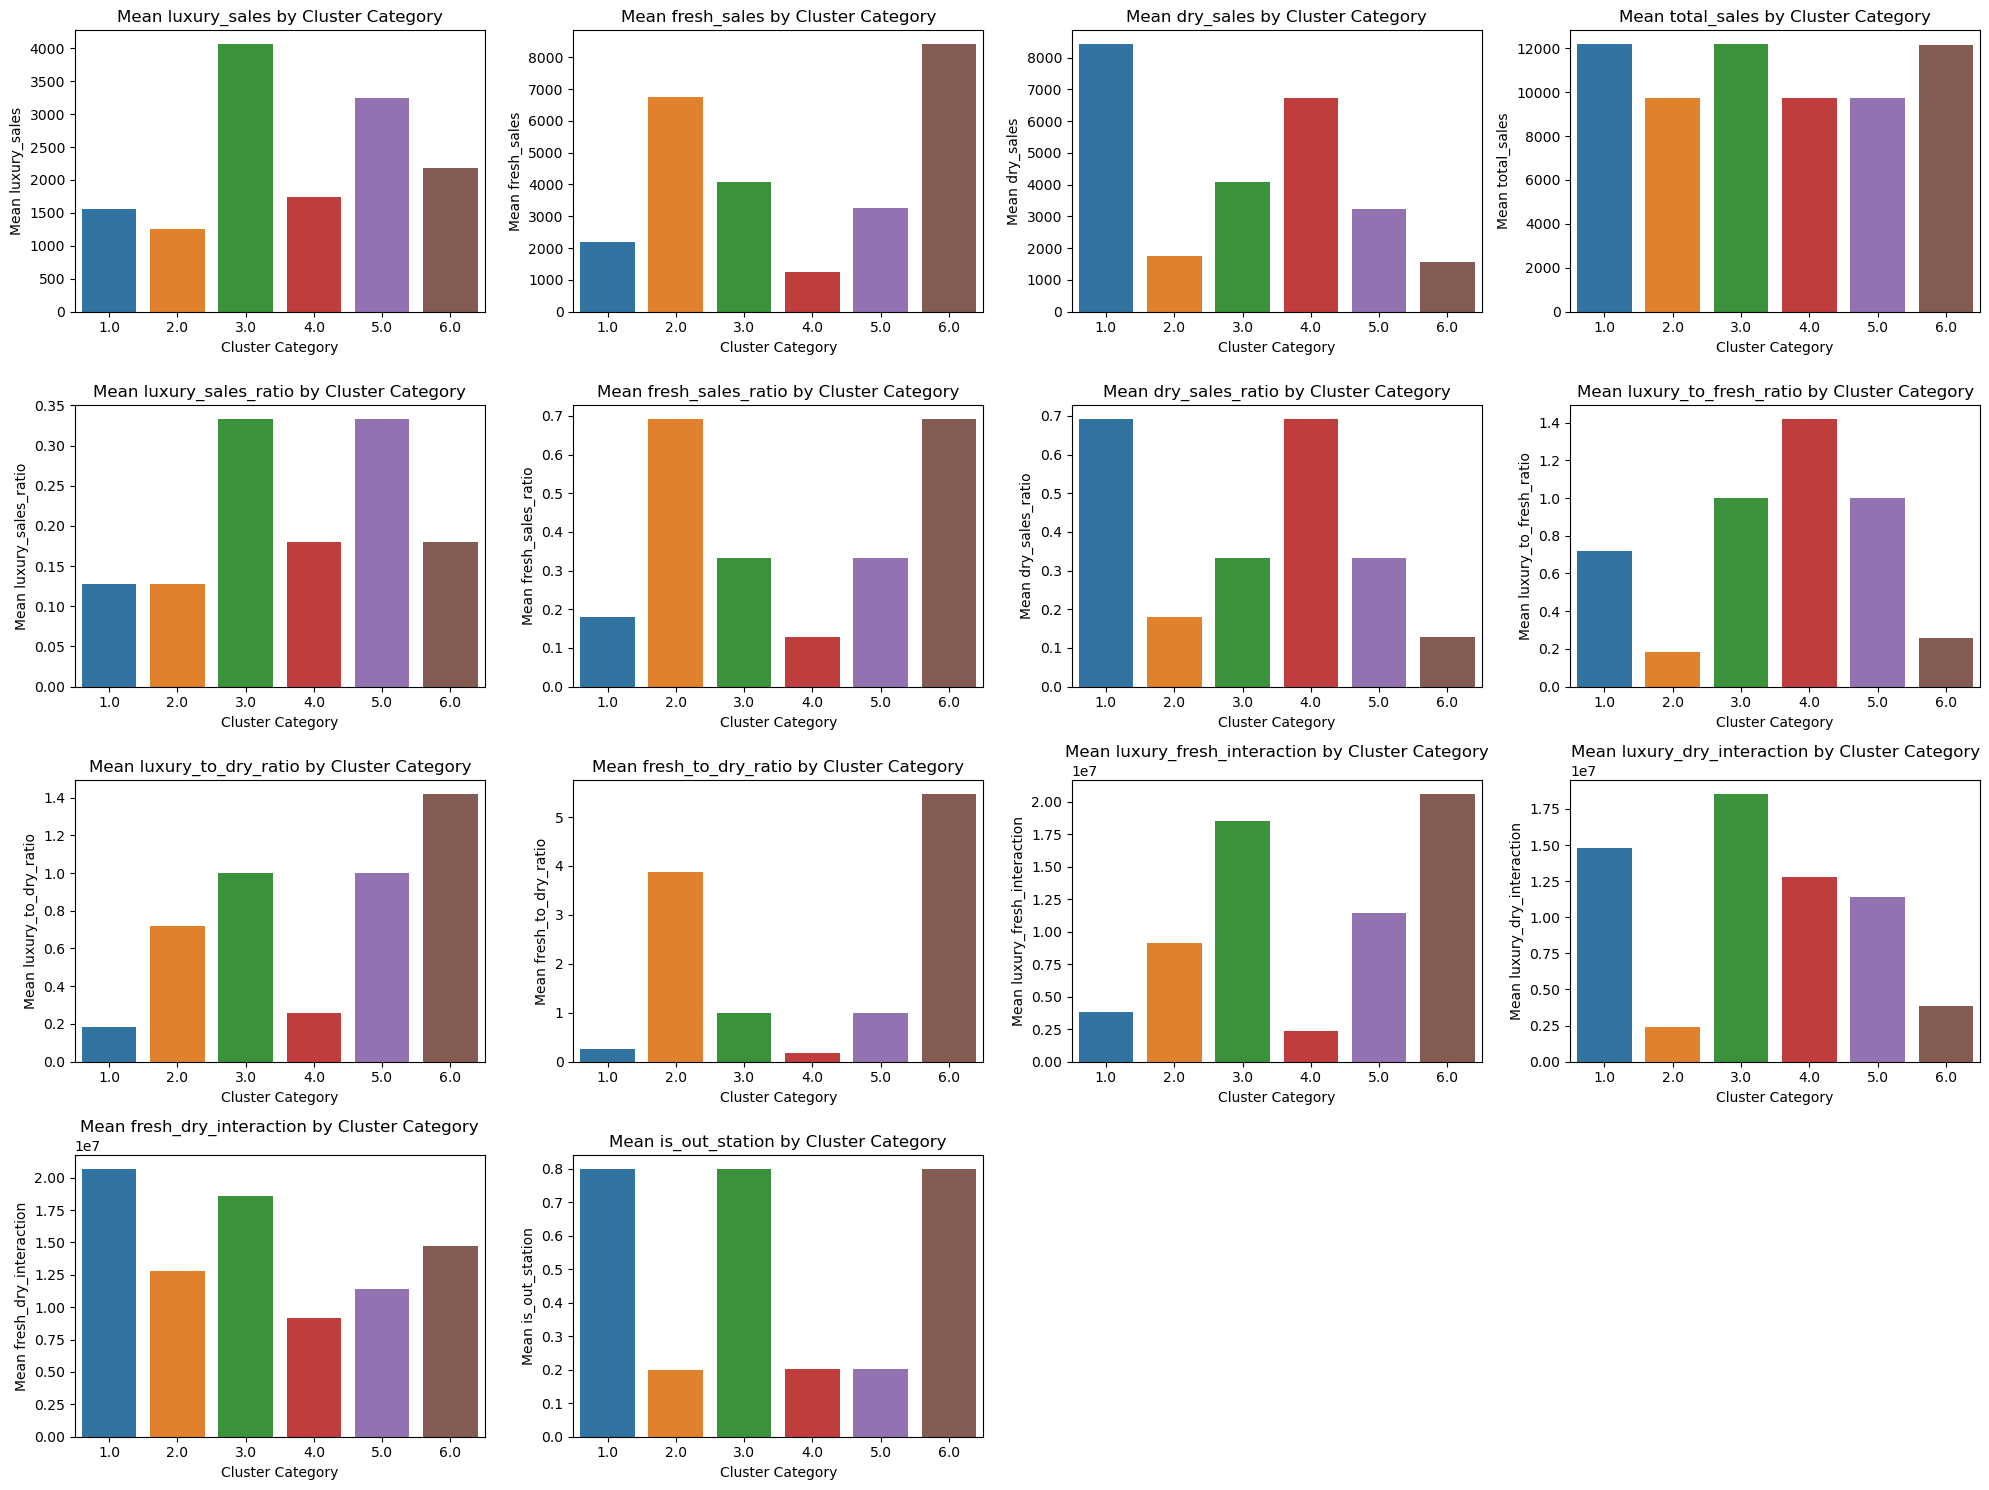

In [39]:
# Group data by cluster category and calculate mean for each feature
cluster_summary = data.groupby('cluster_catgeory').mean()

print("Cluster Summary Statistics:")
print(cluster_summary)

# Plot mean values of key features for each cluster category
key_features = ['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales',
                'luxury_sales_ratio', 'fresh_sales_ratio', 'dry_sales_ratio',
                'luxury_to_fresh_ratio', 'luxury_to_dry_ratio', 'fresh_to_dry_ratio',
                'luxury_fresh_interaction', 'luxury_dry_interaction', 'fresh_dry_interaction',
                'is_out_station']

# Determine the number of rows and columns for subplots
n_features = len(key_features)
n_cols = 4  # Number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(key_features):
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], ax=axes[i])
    axes[i].set_title(f'Mean {feature} by Cluster Category')
    axes[i].set_xlabel('Cluster Category')
    axes[i].set_ylabel(f'Mean {feature}')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3872\2495047010.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


<Axes: >

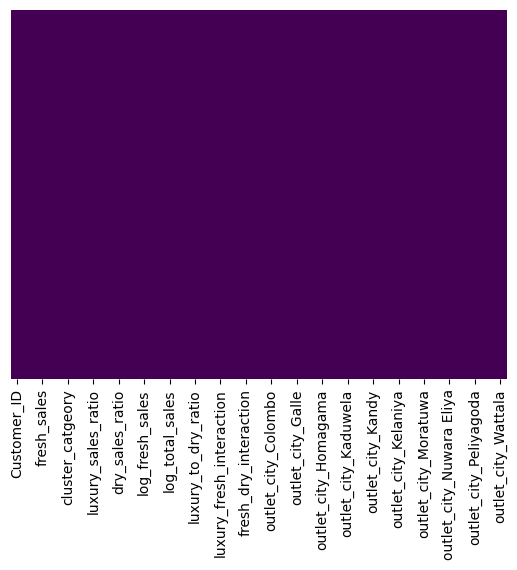

In [36]:
data = preprocess()

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [44]:
data = preprocess()
df = data.copy()
#model 1 - with all features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load your data into a DataFrame (assuming it is already loaded as 'data')

# Drop the 'Customer_ID' column
df = df.drop(columns=['Customer_ID'])

# Separate features and target variable
X = df.drop(columns=['cluster_catgeory'])
y = df['cluster_catgeory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire dataset
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# f1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# precision score
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision Score: {precision}")

# generate feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame in descending order of the feature importances
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Print the DataFrame
print(feature_importances_df)


C:\Users\User\AppData\Local\Temp\ipykernel_21132\737128225.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64
Accuracy: 0.9997739120324016
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30986
           3       1.00      1.00      1.00      9700
           4       1.00      1.00      1.00     34402
           5       1.00      1.00      1.00      7939
           6       1.00      1.00      1.00     33869

    accuracy                           1.00    154807
   macro avg       1.00      1.00      1.00    154807
weighted avg       1.00      1.00      1.00    154807

F1 Score: 0.99977391578475
Precision Score: 0.9997739247361861
                               feature  importance
11               luxury_to_fresh_ratio    0.131646
4                   luxury_sales_ratio    0.123603
6                      dry_sales_ratio    0.123136
12   

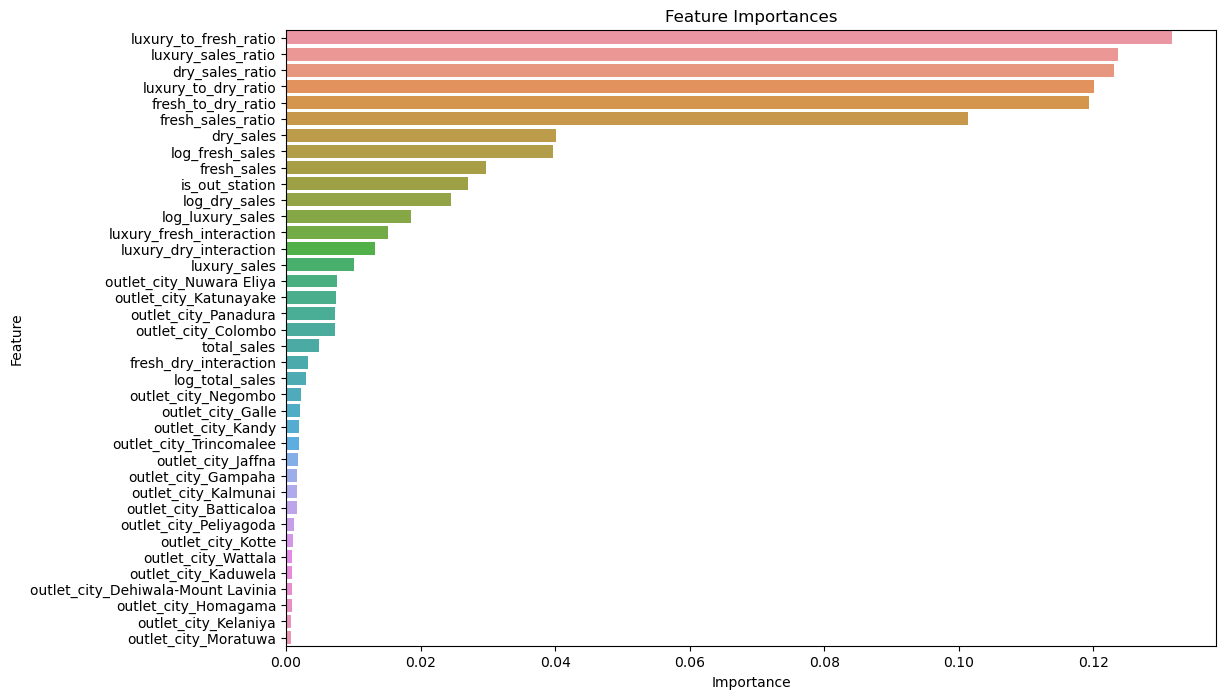

In [26]:
# create a feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
out_station = ['Kalmunai','Negombo','Galle','Gampaha','Batticaloa','Jaffna','Kandy','Trincomalee','Panadura','Nuwara Eliya']

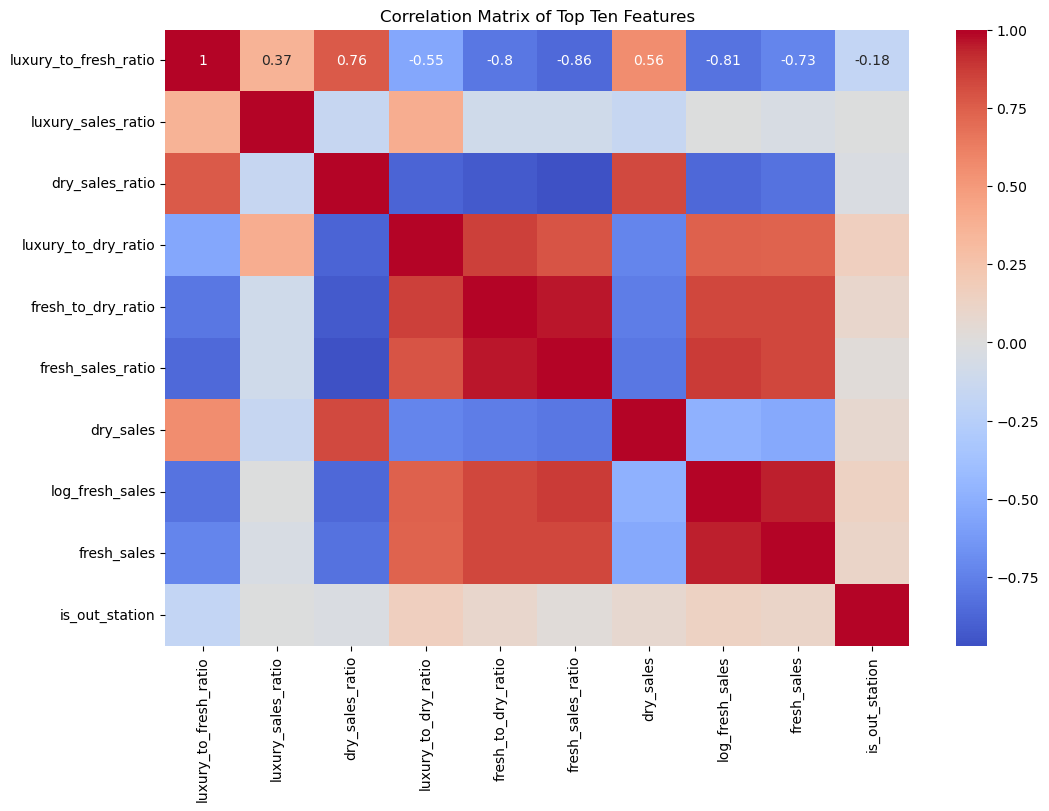

In [27]:
# get top ten features
top_features = feature_importances_df['feature'][:10]

# create a correlation matrix for the top ten features
correlation_matrix = df[top_features].corr()

# create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top Ten Features')
plt.show()

AttributeError: 'Series' object has no attribute 'append'

C:\Users\User\AppData\Local\Temp\ipykernel_3872\2495047010.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


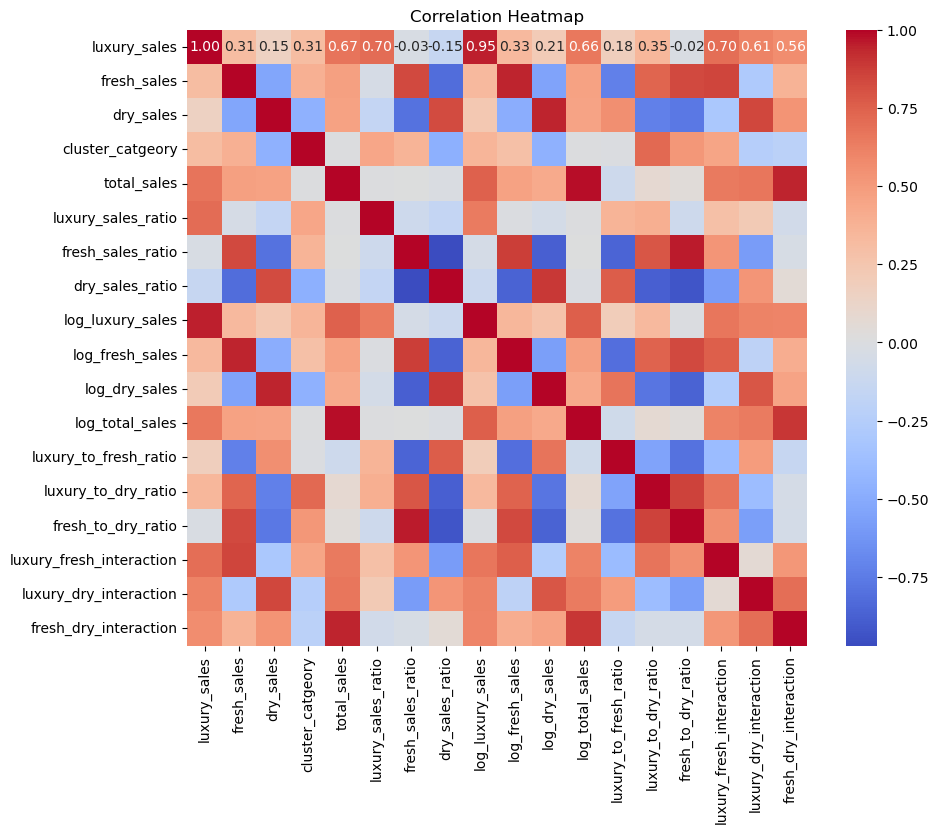

In [35]:
data = preprocess()
col = ['luxury_sales', 'fresh_sales', 'dry_sales',
       'cluster_catgeory', 'total_sales', 'luxury_sales_ratio',
       'fresh_sales_ratio', 'dry_sales_ratio', 'log_luxury_sales',
       'log_fresh_sales', 'log_dry_sales', 'log_total_sales',
       'luxury_to_fresh_ratio', 'luxury_to_dry_ratio', 'fresh_to_dry_ratio',
       'luxury_fresh_interaction', 'luxury_dry_interaction',
       'fresh_dry_interaction']

data = data[col]

# Correlation matrix
corr = data.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv('data/train_kaggle.csv')



# data

In [ ]:
# drop rows where cluster_category is missing
data = data.dropna(subset=['cluster_catgeory'])

In [ ]:
data['luxury_sales'] = pd.to_numeric(data['luxury_sales'], errors='coerce')
data['fresh_sales'] = pd.to_numeric(data['fresh_sales'], errors='coerce')
data['dry_sales'] = pd.to_numeric(data['dry_sales'], errors='coerce')

# convert all three columns to float
data['luxury_sales'] = data['luxury_sales'].astype(float)
data['fresh_sales'] = data['fresh_sales'].astype(float)
data['dry_sales'] = data['dry_sales'].astype(float)




In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
# drop na values
data = data.dropna()

data.shape

In [ ]:
data['total_sales'] = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']

In [ ]:
data.head()

In [ ]:
# get distinct values of Customer_ID
data['cluster_catgeory'].unique().tolist()

In [ ]:
data['cluster_catgeory'].value_counts()

In [ ]:
# Convert the 'cluster_catgeory' column to numeric, coercing errors to NaN
data['cluster_catgeory'] = pd.to_numeric(data['cluster_catgeory'], errors='coerce')

# Drop rows with NaN values in the 'cluster_catgeory' column
data = data.dropna(subset=['cluster_catgeory'])

# Convert the 'cluster_catgeory' column to integers
data['cluster_catgeory'] = data['cluster_catgeory'].astype(int)

# Define the valid categories
valid_categories = [1, 2, 3, 4, 5, 6]

# Filter the rows to keep only those with valid categories
data = data[data['cluster_catgeory'].isin(valid_categories)]

# Get the number of occurrences for each distinct value in the 'cluster_catgeory' column
occurrences = data['cluster_catgeory'].value_counts()

# Print the occurrences
print(occurrences)


In [ ]:
data.shape

In [ ]:
import numpy as np

In [ ]:
data['luxury_sales_ratio'] = data['luxury_sales'] / data['total_sales']
data['fresh_sales_ratio'] = data['fresh_sales'] / data['total_sales']
data['dry_sales_ratio'] = data['dry_sales'] / data['total_sales']

# Logarithmic Sales
data['log_luxury_sales'] = np.log(data['luxury_sales'] + 1)
data['log_fresh_sales'] = np.log(data['fresh_sales'] + 1)
data['log_dry_sales'] = np.log(data['dry_sales'] + 1)
data['log_total_sales'] = np.log(data['total_sales'] + 1)

# Sales Ratios
data['luxury_to_fresh_ratio'] = data['luxury_sales'] / data['fresh_sales']
data['luxury_to_dry_ratio'] = data['luxury_sales'] / data['dry_sales']
data['fresh_to_dry_ratio'] = data['fresh_sales'] / data['dry_sales']

# Interaction Terms
data['luxury_fresh_interaction'] = data['luxury_sales'] * data['fresh_sales']
data['luxury_dry_interaction'] = data['luxury_sales'] * data['dry_sales']
data['fresh_dry_interaction'] = data['fresh_sales'] * data['dry_sales']

In [ ]:
data

In [ ]:
# create bell plot for luxury_sales
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram of 'luxury_sales' with 20 bins
sns.histplot(data['luxury_sales'], bins=20, kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of luxury_sales')
ax.set_xlabel('luxury_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
# Plot a histogram of 'log_luxury_sales' with 20 bins
fig, ax = plt.subplots()
sns.histplot(data['log_luxury_sales'], bins=20, kde=True, ax=ax)


# Set the title and labels
ax.set_title('Distribution of log-transformed luxury_sales')
ax.set_xlabel('log_luxury_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# can be normalized

In [ ]:
# create bell plot for dry_sales
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram of 'dry_sales' with 20 bins
sns.histplot(data['dry_sales'], bins=20, kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of dry_sales')
ax.set_xlabel('dry_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
# Plot a histogram of 'log_luxury_sales' with 20 bins
fig, ax = plt.subplots()
sns.histplot(data['log_dry_sales'], bins=20, kde=True, ax=ax)


# Set the title and labels
ax.set_title('Distribution of log-transformed dry_sales')
ax.set_xlabel('log_dry_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# Plot a histogram of 'log_luxury_sales' with 20 bins
fig, ax = plt.subplots()
sns.histplot(data['log_fresh_sales'], bins=20, kde=True, ax=ax)


# Set the title and labels
ax.set_title('Distribution of log-transformed fresh_sales')
ax.set_xlabel('log_fresh_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# create bell plot for fresh_sales
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram of 'fresh_sales' with 20 bins
sns.histplot(data['fresh_sales'], bins=20, kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of fresh_sales')
ax.set_xlabel('fresh_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
# save first 100 rows to a new csv file
data.head(100).to_csv('features.csv', index=False)

In [ ]:
data.columns

In [ ]:
model_3 = ['Customer_ID',
       'cluster_catgeory','luxury_sales_ratio',
       'fresh_sales_ratio', 'dry_sales_ratio',
       'luxury_to_fresh_ratio', 'luxury_to_dry_ratio', 'fresh_to_dry_ratio',
       'luxury_fresh_interaction', 'luxury_dry_interaction',
       'fresh_dry_interaction', 'outlet_city_Batticaloa',
       'outlet_city_Colombo', 'outlet_city_Dehiwala-Mount Lavinia',
       'outlet_city_Galle', 'outlet_city_Gampaha', 'outlet_city_Homagama',
       'outlet_city_Jaffna', 'outlet_city_Kaduwela', 'outlet_city_Kalmunai',
       'outlet_city_Kandy', 'outlet_city_Katunayake', 'outlet_city_Kelaniya',
       'outlet_city_Kotte', 'outlet_city_Moratuwa', 'outlet_city_Negombo',
       'outlet_city_Nuwara Eliya', 'outlet_city_Panadura',
       'outlet_city_Peliyagoda', 'outlet_city_Trincomalee',
       'outlet_city_Wattala']

In [ ]:
df = data[model_3]

df

In [ ]:
# one hot encode the 
data = pd.get_dummies(data, columns=['outlet_city'])

data.head()

In [ ]:
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

data.head()

# Model

In [ ]:
df = data.copy()

In [ ]:
data

In [ ]:
#model 1 - with all features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load your data into a DataFrame (assuming it is already loaded as 'data')

# Drop the 'Customer_ID' column
# data = data.drop(columns=['Customer_ID'])

# Separate features and target variable
X = data.drop(columns=['cluster_catgeory'])
y = data['cluster_catgeory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire dataset
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

with open('rf_classifier_model_1.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)


In [ ]:
with open('rf_classifier_model_1.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [ ]:
# model 2 - with log features and outlet_city features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import StandardScaler


# Drop the 'Customer_ID' column
# data = data.drop(columns=['Customer_ID'])

# get columns starts with "outlet_city" in column names
outlet_city_columns = [col for col in data.columns if 'outlet_city' in col]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['cluster_catgeory']))

# Separate features and target variable
X = data[['log_total_sales', 'log_luxury_sales', 'log_fresh_sales', 'log_dry_sales'] + outlet_city_columns]
y = data['cluster_catgeory']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire dataset
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


with open('rf_classifier_model_2.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [ ]:
# get feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf_classifier.feature_importances_

# Get the indices of the features sorted by importance
indices = importances.argsort()[::-1]

# Get the feature names
feature_names = X.columns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the feature importances
sns.barplot(x=importances[indices], y=feature_names[indices], ax=ax)

# Set the title and labels
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()

In [ ]:
#model 1 - with all features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load your data into a DataFrame (assuming it is already loaded as 'data')

# Drop the 'Customer_ID' column
df = df.drop(columns=['Customer_ID'])

# Separate features and target variable
X = df.drop(columns=['cluster_catgeory'])
y = df['cluster_catgeory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire dataset
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

with open('rf_classifier_model_3.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [ ]:
X.columns

In [ ]:
# get feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf_classifier.feature_importances_

# Get the indices of the features sorted by importance
indices = importances.argsort()[::-1]

# Get the feature names
feature_names = X.columns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the feature importances
sns.barplot(x=importances[indices], y=feature_names[indices], ax=ax)

# Set the title and labels
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()

In [ ]:
df.columns

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load your data into a DataFrame (assuming it is already loaded as 'data')

# Drop the 'Customer_ID' column
df = df.drop(columns=['Customer_ID'])

# Separate features and target variable
X = df.drop(columns=['cluster_catgeory'])
y = df['cluster_catgeory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid,
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

# Train the classifier with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Save the best model to a file
with open('best_rf_classifier_model__gridsearch.pkl', 'wb') as model_file:
    pickle.dump(best_rf_classifier, model_file)


In [13]:
df = preprocess()

C:\Users\User\AppData\Local\Temp\ipykernel_3872\2495047010.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


class occurences: cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


In [11]:
# df.columns

In [14]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales', 'log_total_sales']] = scaler.fit_transform(df[['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales', 'log_total_sales']])

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales']])


In [15]:
log_sales_features = df[['log_luxury_sales', 'log_fresh_sales', 'log_dry_sales']]
poly_feature_names = poly.get_feature_names_out(log_sales_features.columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)

# Combine polynomial features with the original DataFrame
df = pd.concat([df, poly_df], axis=1)

df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,...,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,log_luxury_sales,log_fresh_sales,log_dry_sales,log_luxury_sales log_fresh_sales,log_luxury_sales log_dry_sales,log_fresh_sales log_dry_sales
0,10493832.0,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,-0.719119,...,0,0,0,0,-0.719119,-1.774998,0.522455,1.276434,-0.375707,-0.927356
1,10178643.0,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,-0.149549,...,0,0,0,0,-0.149549,-1.363533,0.679416,0.203915,-0.101606,-0.926406
2,10513916.0,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,0.609110,...,0,0,0,1,0.609110,-0.956391,1.201299,-0.582547,0.731723,-1.148911
3,10334589.0,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,0.596386,...,0,0,0,1,0.596386,-0.760400,1.193733,-0.453492,0.711925,-0.907715
4,10458365.0,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,0.660001,...,0,0,0,0,0.660001,-0.548928,1.213209,-0.362293,0.800719,-0.665965


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_features = pca.fit_transform(df.drop(columns=['Customer_ID', 'cluster_catgeory']))


In [18]:
pca_feature_names = [f'pca_{i+1}' for i in range(pca_features.shape[1])]
pca_df = pd.DataFrame(pca_features, columns=pca_feature_names, index=df.index)

In [19]:
df_pca = pd.concat([pca_df, df[['cluster_catgeory']]], axis=1)

df_pca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,cluster_catgeory
0,-1.364749e+07,-2.655376e+06,1.965159e+06,-1235.286274,915.571396,100.469710,-0.686116,-0.356241,-0.350757,-0.396693,4
1,-1.013971e+07,-4.470196e+06,2.692096e+06,-1178.108440,159.451805,-34.817246,-0.356463,0.229621,-0.422663,-0.043413,1
2,9.838246e+05,-1.160908e+07,5.850515e+06,-1371.941159,-2120.902816,206.109165,-0.349672,0.252131,-0.049046,-0.068909,4
3,2.806288e+06,-1.144133e+07,4.369284e+06,-1055.264436,-1674.372490,151.563160,-0.245312,0.230013,0.007221,-0.003480,4
4,6.090825e+06,-1.198352e+07,3.114216e+06,-552.951479,-1352.708095,140.205641,-0.221565,0.146381,0.011036,-0.069124,4


In [22]:
X = df_pca.drop(columns=['cluster_catgeory'])
y = df_pca['cluster_catgeory']

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Save the model to a file
with open('rf_classifier_model_with_pca_features.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

Accuracy: 0.9997545330637504
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30986
           3       1.00      1.00      1.00      9700
           4       1.00      1.00      1.00     34402
           5       1.00      1.00      1.00      7939
           6       1.00      1.00      1.00     33869

    accuracy                           1.00    154807
   macro avg       1.00      1.00      1.00    154807
weighted avg       1.00      1.00      1.00    154807

